<a href="https://colab.research.google.com/github/madhu8888/AnomalyDetection/blob/main/Data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import random
from sklearn.datasets import make_spd_matrix;

In [ ]:
col_hyperparameters=['DatabaseName','N_gauss','N_Samples','Cont_factor','N_Features','N_Categorical','Missing_Per', 'Cov_Type', 'Mix_Coeff', 'Mu_Vector', 'Cov_matrix', 'Dep_per']
df_hyperparameters = pd.DataFrame(columns = col_hyperparameters);

In [ ]:
cov_matrix_lst = []
mu_vector_lst = []

In [ ]:
def mixing_coefficients(n_Gauss_comp):
    """
    This function is used to create the mixing coefficients 
    during data generation by 
    Gaussian mixture models
    """
    print("Number of Gauss: ", n_Gauss_comp)
    sum_x =0;
    x  = []
    for i in range(n_Gauss_comp):
      x_temp = (round(random.uniform(0,1), 2));
      x.append(x_temp)
      sum_x = sum_x + x_temp;
    mix_coef = [num / sum_x for num in x]
    #df_hyperparameters['Mix_Coeff'] = mix_coef;
    return mix_coef

In [ ]:
def mu_vector( n_features, low_range, high_range):
    """
    This function is used to generate the mean vector for various
    Gaussians in GMM
    """
    mu_set = set()
    while(len(mu_set) < n_features):
      mu_set.add(random.randint(low_range, high_range))
    mu_vector_lst.append(mu_set)
    return list(mu_set);

In [ ]:
def make_cov_matrix(cov_type , n_features,n_Gauss_comp ):
    mincv = 0.1;
    cov_mat = [];
    if cov_type.lower() == "tied-full":
      print("tied-full")
      cov_m_temp = make_spd_matrix(n_features)
      cov_m = np.linalg.cholesky(cov_m_temp)
      #print(cov_m)
      cov_mat.append(cov_m)
      cov_matrix_lst.append(cov_mat)
      return cov_mat
    elif cov_type.lower() == "tied-diag":
      print("tied-diag")
      cov_m = (mincv + mincv * np.dot(np.random.random((n_features, 1)),np.ones((1, n_features)))) ** 2;
      cov_m = np.diag(np.diag(cov_m)) 
      #print(cov_m)
      cov_mat.append(cov_m)
      cov_matrix_lst.append(cov_mat)
      return cov_mat
    elif cov_type.lower() == "tied-sph":
      #cov_m = (mincv + mincv * np.dot(rand((n_components, 1)),np.ones((1, n_features)))) ** 2
      cov_m = np.random.random()* np.eye(n_features,n_features)
      #print(cov_m)
      cov_mat.append(cov_m)
      cov_matrix_lst.append(cov_mat)
      return cov_mat
    elif cov_type.lower() == "diff-full":
      #print("diff-full")
      for i in range(n_Gauss_comp):
        #print("///////////////////")
        cov_m_temp = make_spd_matrix(n_features)
        cov_m = np.linalg.cholesky(cov_m_temp)
        #print(cov_m)
        cov_mat.append(cov_m)
      cov_matrix_lst.append(cov_mat)
      return cov_mat
    elif cov_type.lower() == "diff-diag":
      #print("diff-diag")
      for i in range(n_Gauss_comp):
        #print("///////////////////")
        cov_m = (mincv + mincv * np.dot(np.random.random((n_features, 1)),np.ones((1, n_features)))) ** 2;
        cov_m = np.diag(np.diag(cov_m))
        #print(cov_m)
        cov_mat.append(cov_m)
      cov_matrix_lst.aappend(cov_mat)
      return cov_mat

In [ ]:
def generate_cov_matrix(n_Gauss_comp, n_features):
    """
    This function is used to generate covariance matrix
    for various Gaussians in GMM
    """
    #spd_matrix = make_spd_matrix(self.n_features)
    #cov_matrix = np.linalg.cholesky(spd_matrix) 
    #print("cov_matrix : ", cov_matrix)
    return 1# cov_matrix

In [ ]:
def generate_multivariate_gaussian_data(n_features, mean, cov):
    """
    This function is used to generate single multivariate Gaussian RV
    """
    z = []
    for i in range(n_features):
      u1 = np.random.uniform(0,1)
      u2 = np.random.uniform(0,1)
      z1 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
      z.append(z1)
    z = np.array(z)
    mvn_rv = mean + z.dot(cov)
    return mvn_rv

In [ ]:
def generate_GMM_inliers(n_Gauss_comp, n_features , n_inliers , cov_type, mu_low_range,mu_high_range):
    """
    This function is used to generate GMM inliers data 
    """
    mix_probab = mixing_coefficients(n_Gauss_comp)#(self.n_Gauss_comp);
    X_Train = []
    Y_Train = []
    mu_val = []
    #cov_mat = []
    cov_mat = make_cov_matrix(cov_type ,n_features,n_Gauss_comp);


    for val in mix_probab:
      num_samples = int(val * n_inliers);
      #print("num_samples: ",num_samples)
      mu_val = mu_vector(n_features,mu_low_range,mu_high_range)#self.n_features, 1, 40); 
      #print("mu_val: ",mu_val)
      cov_mat = generate_cov_matrix(n_Gauss_comp, n_features)#(self.n_Gauss_comp, self.n_features)
      for j in range(num_samples):
        X_train_temp  = generate_multivariate_gaussian_data(n_features,mu_val, cov_mat) #(self.n_features, mu_val, cov_mat)
        X_Train.append(X_train_temp)
      #print(len(X_Train))
    return X_Train

In [ ]:
def generate_Uniform_outliers(n_outliers, n_features , uni_low, uni_up):
    """
    This function is used to generate uniform outliers data 
    """
    outliers = np.random.uniform(uni_low,uni_up, size= (n_outliers, n_features));
    return outliers;

In [ ]:
def multinouli( n_cat ):
    sum_x =0;
    x  = []
    pdf_list =[]
    for i in range(n_cat):
      x_temp = (round(random.uniform(0,1), 2));
      x.append(x_temp)
      sum_x = sum_x + x_temp;
    p_list = [num / sum_x for num in x]
    cdf_list = []
    sum = 0
    for i in range(len(p_list)):
      sum = sum + p_list[i]
      cdf_list.append(sum)
    r_num = np.random.uniform(0,1)
    for i in range(len(cdf_list)):
      if r_num < cdf_list[i]:
        return i 

In [ ]:
def generate_categorical(num_cat ):
    n_cat_var = num_cat;
    cat_col = []
    for i in range(n_cat_var):
      cat_col_temp = []
      num_categories = multinouli(10)
      num_categories = num_categories +2
      #print("num_categories: ",num_categories)
      #cat_col= []
      #for j in range(n_cat_var):
      cat_val = multinouli(num_categories)
      chr_val =  chr(65+cat_val) #+ chr(65+cat_val) 
      #print(chr_val)
      #cat_col_temp.append(chr_val)
      cat_col.append(chr_val)
    return cat_col
    #print(cat_col)

In [ ]:
def combine_inlier_outlier_label(n_Gauss_comp, samples, cont, n_features , num_cat , missing_percent, cov_type, dep_per , uni_low, uni_up , mu_low_range,mu_high_range):
    n_outliers = int(cont * samples);
    n_inliers = samples - n_outliers;

    column_list = []
    for i in range(n_features):
      col_name = 'X'+str(i)
      column_list.append(col_name)
    
    inliers = generate_GMM_inliers(n_Gauss_comp, n_features, n_inliers , cov_type, mu_low_range,mu_high_range) #self.n_Gauss_comp , self.n_features, self.n_inliers)
    df_inliers = pd.DataFrame(inliers, columns =column_list)
    df_inliers['Label']= 0 # inliers label 0
    #print("Inliers")
    #print(df_inliers)
    
    outliers = generate_Uniform_outliers(n_outliers, n_features ,uni_low, uni_up) #self.n_outliers, self.n_features)
    df_outliers = pd.DataFrame(outliers , columns=column_list)
    df_outliers['Label']= 1 # inliers label 1
    #print("Outliers")
    #print(df_outliers)
    # create a pd dataframe

    final_dataset = pd.concat([df_outliers, df_inliers], axis=0, ignore_index=True)


    if(num_cat>0):
      cat_column_list = []
      for i in range(num_cat):
        cat_col_name = 'C'+str(i)
        cat_column_list.append(cat_col_name)
      #print(cat_column_list)
      num_datapoints = len(df_outliers)+len(df_inliers)
      cat_data = []
      for i in range(num_datapoints):
        col_temp = generate_categorical(num_cat)
        #print("col_temp: ",col_temp)
        cat_data.append(col_temp)
      #print(cat_data)
      df_cat = pd.DataFrame(cat_data, columns = cat_column_list)
      final_dataset = pd.concat([df_cat, final_dataset], axis=1)
    #return df_dataset
    return final_dataset

In [ ]:
def write_excel(df_hyperparameters):
  name = str(df_hyperparameters['DatabaseName'])
  #print(name)
  df_hyperparameters.to_excel(name+".xlsx")  


In [ ]:
def GenerateDataset(n_Gauss_comp, samples, cont, n_features , num_cat , missing_percent, cov_type, dep_per , uni_low, uni_up , mu_low_range,mu_high_range ):
  df_hyperparameters['DatabaseName'] = "DB_"+ str(samples)+"_"+str(cont)+"_"+str(n_features)+"_"+str(num_cat)+"_"+str(missing_percent)+"_"+str(cov_type)+"_"+str(dep_per);
  df_hyperparameters['N_gauss'] = n_Gauss_comp;
  df_hyperparameters['N_Samples'] = samples;
  df_hyperparameters['Cont_factor'] = cont;
  df_hyperparameters['N_Features'] = n_features;
  df_hyperparameters['N_Categorical'] = num_cat;
  df_hyperparameters['Missing_Per'] = missing_percent;
  df_hyperparameters['Cov_Type']= cov_type;
  df_hyperparameters['Dependency_percentage'] = dep_per;


  df_Dataset = combine_inlier_outlier_label(n_Gauss_comp, samples, cont, n_features , num_cat , missing_percent, cov_type, dep_per , uni_low, uni_up ,mu_low_range,mu_high_range);

  #write_excel(df_hyperparameters);

  return df_Dataset;


In [ ]:
df = GenerateDataset(n_Gauss_comp= 3, samples=100, cont=0.1, n_features=2 , num_cat=5 , missing_percent=0, cov_type="tied-sph", dep_per=0 , uni_low=10, uni_up=20, mu_low_range=20,mu_high_range=40)

Number of Gauss:  3


In [ ]:
df

,C0,C1,C2,C3,C4,X0,X1,Label
0,B,C,D,B,E,13.921168,16.085213,1
1,F,A,B,G,C,14.273645,11.349234,1
2,D,A,C,E,D,15.025847,11.652899,1
3,C,E,E,A,F,16.177096,10.627219,1
4,C,B,B,B,E,18.053697,10.105520,1
...,...,...,...,...,...,...,...,...
94,A,A,B,C,B,22.514253,23.394211,0
95,I,E,D,B,A,22.897518,23.640683,0
96,D,A,A,C,C,20.245805,24.132204,0
97,H,B,D,H,A,22.531306,21.800047,0


# Scatter plot

In [ ]:
import seaborn as sns

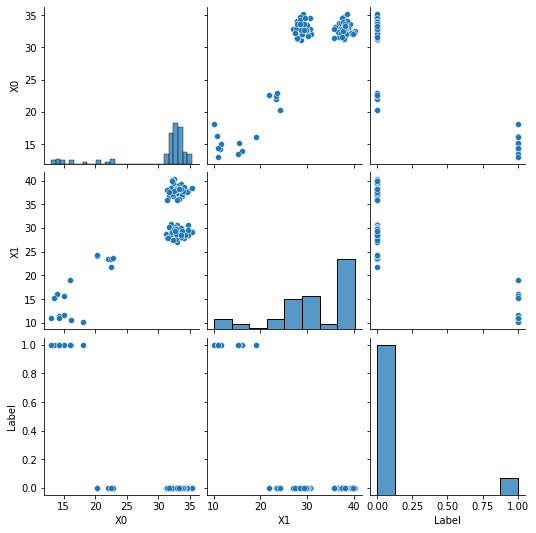

In [ ]:
sns.pairplot(df)

# Generate missing values in python
https://rmisstastic.netlify.app/how-to/python/generate_html/how%20to%20generate%20missing%20values

1. https://stackoverflow.com/questions/42091018/randomly-insert-nas-values-in-a-pandas-dataframe-with-no-rows-completely-miss

1. https://stackoverflow.com/questions/42091018/randomly-insert-nas-values-in-a-pandas-dataframe-with-no-rows-completely-miss

In [ ]:
import collections

In [ ]:
df = pd.DataFrame({'A':[1,2,3],
                   'B':[4,5,6],
                   'C':[7,8,9]})

In [ ]:
def missing_val(percent , df):
  replaced = collections.defaultdict(set)
  ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
  random.shuffle(ix)
  to_replace = int(round(percent*len(ix)))
  for row, col in ix:
    if len(replaced[row]) < df.shape[1] - 1:
        df.iloc[row, col] = np.nan
        to_replace -= 1
        replaced[row].add(col)
        if to_replace == 0:
            break
  return df

In [ ]:
df_out = missing_val(0.3, df)

In [ ]:
df_out

,A,B,C
0,1.0,4.0,NaN
1,2.0,NaN,8.0
2,NaN,6.0,9.0
